<a href="https://colab.research.google.com/github/prathyusha0310/RSI/blob/main/RSI_(technical_Indicator)%5Bmomentum%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import scipy.stats as stats
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, Image
import plotly.graph_objects as go
!pip install quandl


In [ ]:
import quandl as qdl
api=qdl.ApiConfig.api_key='RGoU8urdFFD_fB7QjV51'

In [ ]:
start='2010-01-01'
end='2018-01-01'  
fb=qdl.get('WIKI/FB',start_date=start,end_date=end)
original_copy = fb

In [ ]:
fb.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


In [ ]:
fb.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=1413, freq=None)

In [ ]:
fb.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-22,177.14,177.5300,176.23,177.20,8462491.0,0.0,1.0,177.14,177.5300,176.23,177.20,8462491.0
2017-12-26,176.63,177.0000,174.67,175.99,8726829.0,0.0,1.0,176.63,177.0000,174.67,175.99,8726829.0
2017-12-27,176.55,178.4400,176.26,177.62,9296258.0,0.0,1.0,176.55,178.4400,176.26,177.62,9296258.0
2017-12-28,177.95,178.9367,177.68,177.92,11008996.0,0.0,1.0,177.95,178.9367,177.68,177.92,11008996.0
2017-12-29,178.00,178.8500,176.46,176.46,10028758.0,0.0,1.0,178.00,178.8500,176.46,176.46,10028758.0


In [ ]:
fig=go.Figure(data=[go.Candlestick(x=fb.index,open=fb['Open'],close=fb['Close'],low=fb['Low'],high=fb['High'])])
fig.show()

In [ ]:
fb.isna().sum()# to check if there are any null values.

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [ ]:
def get_rsi(df,time_period):
  diff=df.diff(1).dropna()
  up=0*diff # to match with the dimension and avoid error (as we just cant write "0")
  down=0*diff
  up[diff>0]=diff[diff>0]
  down[diff<0]=diff[diff<0]
  #computing exponential weighted mean
  #com= time_period-1 because alpha= 1/1+com i.e equal to 1/time_period 
  roll_up = up.rolling(time_period).mean()
  roll_down = down.abs().rolling(time_period).mean()
  avg_up=up.ewm(com=time_period-1,min_periods=time_period).mean()
  avg_down=down.ewm(com=time_period-1,min_periods=time_period).mean()
  rs_roll=roll_up/roll_down
  rs=abs(avg_up/avg_down)
  rsi_roll=100-(100/(1+ rs_roll))
  rsi=100- (100/(1+rs))
  return rsi

In [ ]:
fb['RSI']=get_rsi(fb['Adj. Close'],14)#dataset is days based so here 14 indicates that timeperiod is 14 days
fb['RSI_ROLL']=get_rsi(fb['Adj. Close'],14)

In [ ]:
fb.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,RSI,RSI_ROLL
Date,,,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0,NaN,NaN
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,NaN,NaN
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,NaN,NaN
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,NaN,NaN
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,NaN,NaN


In [ ]:
fb.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,RSI,RSI_ROLL
Date,,,,,,,,,,,,,,
2017-12-22,177.14,177.5300,176.23,177.20,8462491.0,0.0,1.0,177.14,177.5300,176.23,177.20,8462491.0,47.827891,47.827891
2017-12-26,176.63,177.0000,174.67,175.99,8726829.0,0.0,1.0,176.63,177.0000,174.67,175.99,8726829.0,44.915014,44.915014
2017-12-27,176.55,178.4400,176.26,177.62,9296258.0,0.0,1.0,176.55,178.4400,176.26,177.62,9296258.0,49.386900,49.386900
2017-12-28,177.95,178.9367,177.68,177.92,11008996.0,0.0,1.0,177.95,178.9367,177.68,177.92,11008996.0,50.188405,50.188405
2017-12-29,178.00,178.8500,176.46,176.46,10028758.0,0.0,1.0,178.00,178.8500,176.46,176.46,10028758.0,46.342169,46.342169


# **In the plot, those above 70 are over-valued(or over-bought) and those below 30 are under-valued(or oversold)**

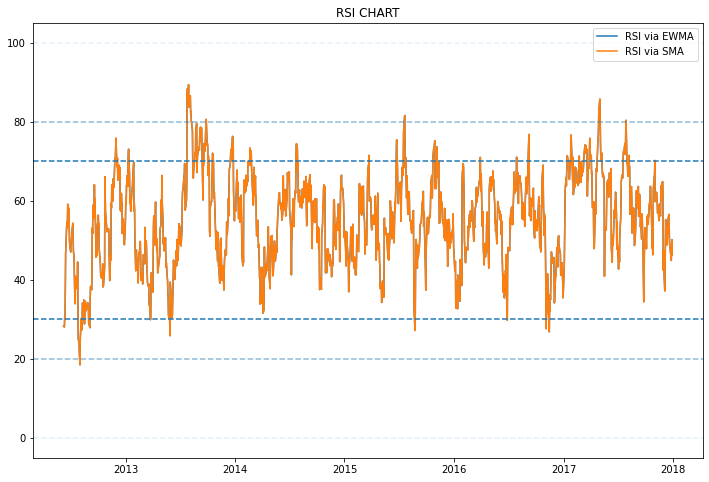

In [ ]:
plt.figure(figsize=(12,8))
plt.title("RSI CHART")
plt.plot(fb['RSI'])
plt.plot(fb['RSI_ROLL'])
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()
